In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
import scipy as sp

Question 1

Hypothesis Testing Exercise

     A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

Step 1

- Make two Hypothesis one contridicting to other
- We need to prove 'Null Hypothesis'
   
   - Null Hypothesis : μ1 = μ2
   - Alternative Hypothesis = μ1 != μ2

Step 2

Decide a cut-off value

 - Significance = 5%
 - alpha = 0.05
 
 As it is a two tailed test
   - alpha/2 = 0.025

Step 3

Collect Evidance

 Importing files

In [27]:
df=pd.read_csv('Cutlets.csv')

In [28]:
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [29]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


Checking for Null values

In [30]:
df.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

checking for duplicates

In [31]:
df[df.duplicated()].shape

(0, 2)

In [32]:
df[df.duplicated()]

,Unit A,Unit B


Checking the data type

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


Plotting the data

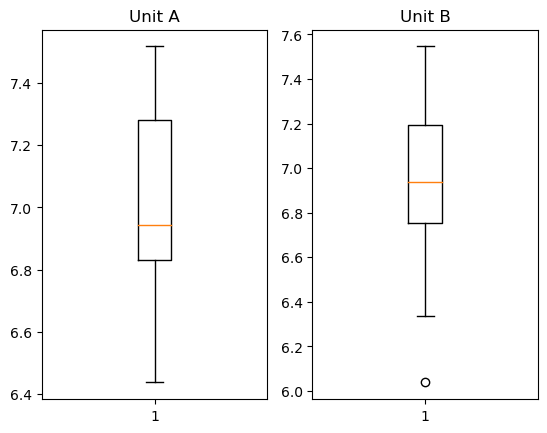

In [50]:
plt.subplot(121)
plt.boxplot(df['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(df['Unit B'])
plt.title('Unit B')
plt.show()               

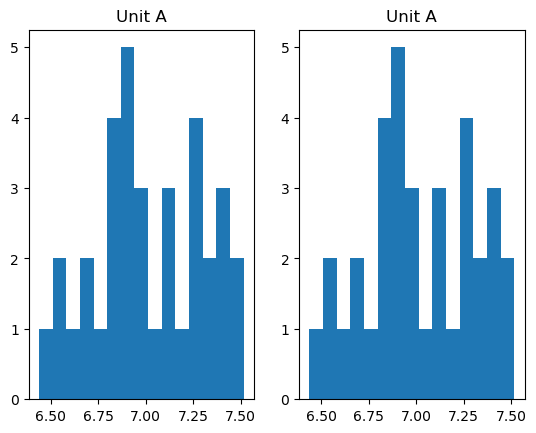

In [51]:
plt.subplot(121)
plt.hist(df['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(df['Unit A'], bins = 15)
plt.title('Unit A')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


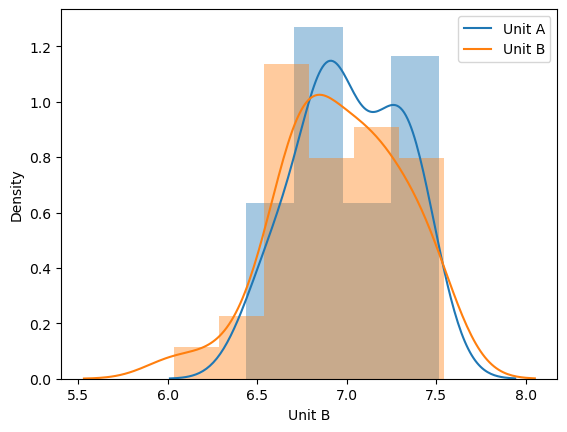

In [60]:
labels = ['Unit A','Unit B']
sns.distplot(df['Unit A'])
sns.distplot(df['Unit B'])
plt.legend(labels)

Plotting Q-Q plot to check whether it follows nomal distribution or not

Question 2
   
   A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
   Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import scipy as sp
from scipy.stats import norm

In [72]:
df=pd.read_csv("LabTAT.csv")
df

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [73]:
df.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [74]:
df.tail()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87
119,182.09,215.17,221.49,162.21


In [75]:
df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [76]:
df.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [79]:
A=df["Laboratory 1"].mean()
B=df["Laboratory 2"].mean()
C=df["Laboratory 3"].mean()
D=df["Laboratory 4"].mean()

In [80]:
print(A>B,B>C,C>D,D>A)

False False True False


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

TypeError: legend only accepts two non-keyword arguments

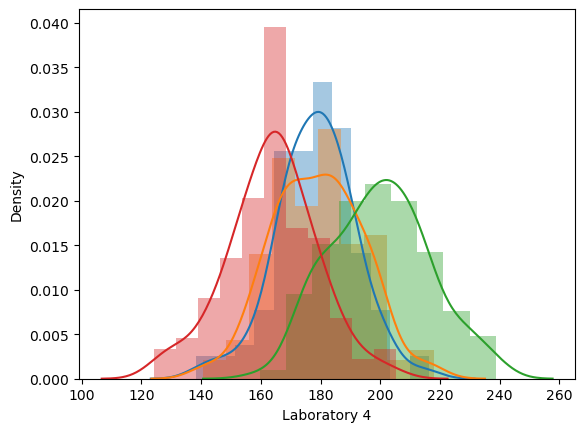

In [81]:
sns.distplot(df["Laboratory 1"])
sns.distplot(df["Laboratory 2"])
sns.distplot(df["Laboratory 3"])
sns.distplot(df["Laboratory 4"])
plt.legend("Laboratory 1","Laboratory 2","Laboratory 3","Laboratory 4")

In [82]:
L1=pd.DataFrame(df["Laboratory 1"])
L2=pd.DataFrame(df["Laboratory 2"])
L3=pd.DataFrame(df["Laboratory 3"])
L4=pd.DataFrame(df["Laboratory 4"])

In [84]:
tstat,pvalue=stats.f_oneway(L1,L2,L3,L4)
print(tstat,pvalue)

[118.70421654] [2.11567089e-57]


In [100]:
if pvalue>0.05:
    ("Null Hypothesis cannot be rejected")
else:
    print("Null Hypothesis rejected")

Null Hypothesis rejected


Question 3

      Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.
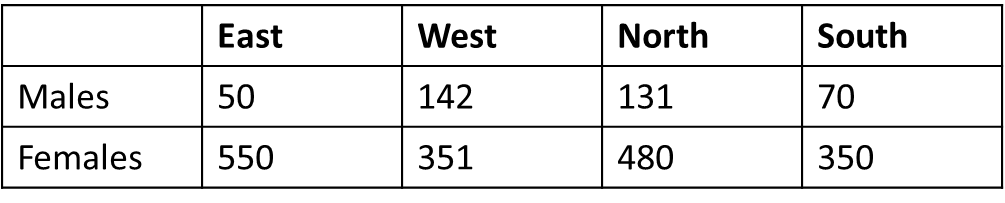

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
import scipy as sp

In [90]:
df=pd.read_csv("BuyerRatio.csv")
df

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [92]:
df.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [93]:
A=df["East"].mean()
B=df["West"].mean()
C=df["North"].mean()
D=df["South"].mean()

In [94]:
print(A>B,B>C,C>D,D>A)

False True True True


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: distplot() got an unexpected keyword argument 'f'

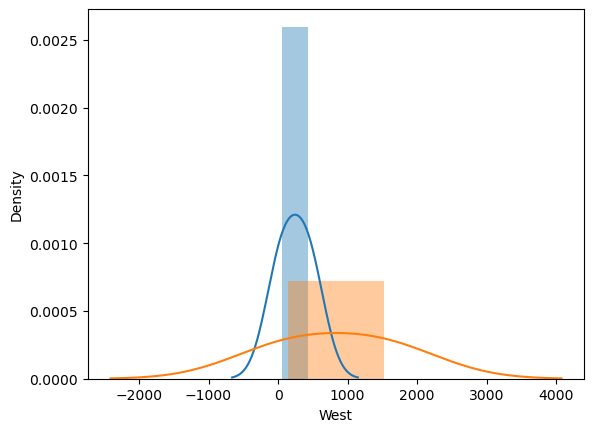

In [95]:
sns.distplot(df["East"])
sns.distplot(df["West"])
sns.distplot(f=df["North"])
sns.distplot(df["South"])
plt.legend("East","West","North","South")

In [98]:
male=[50,142,131,70]
female=[435,1523,11356,750]
Sales=[male,female]

In [99]:
chiStats = stats.chi2_contingency(Sales)
chiStats[0],chiStats[1],chiStats[2]

(531.3414490038706, 7.693293741148206e-115, 3)

In [101]:
if chiStats[1]>0.05:
    print("Null Hypothesis cannot be Rejected")
else:
    print("Reject Null Hypothesis")

Reject Null Hypothesis


Question 4

  TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy as sp
from scipy.stats import norm
import statsmodels.api as sm

In [106]:
df=pd.read_csv("Costomer+OrderForm.csv")
df

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [107]:
df.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [108]:
df.tail()

,Phillippines,Indonesia,Malta,India
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free
299,Error Free,Defective,Defective,Error Free


In [109]:
df.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [111]:
df.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [112]:
df[df.duplicated()].shape

(290, 4)

In [115]:
Phillippines =df["Phillippines"].value_counts()
Phillippines

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [116]:
Indonesia=df["Indonesia"].value_counts()
Indonesia

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [117]:
Malta=df["Malta"].value_counts()
Malta

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [118]:
India=df["India"].value_counts()
India

Error Free    280
Defective      20
Name: India, dtype: int64

In [119]:
chistats=sp.stats.chi2_contingency([[271,267,269,280],[29,33,31,20]])
chistats[0],chistats[1],chistats[2],chistats[3]

(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

In [120]:
if chistats[1]>0.05:
    print("Null Hypothesis cannot be Rejected")
else:
    print("Reject Null Hypothesis")

Null Hypothesis cannot be Rejected
